## 1. Veriyi Yükleme ve Genel Bilgiler

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv(r'C:\Users\Harun\Desktop\MachineLearningProjects\PredictRentHouse\rent.csv')

In [6]:
df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## 2. Sayısal Sütunlardaki Aykırı Değerlerin Temizlenmesi

In [8]:
# Sadece sayısal sütunları seçme
numeric_columns = df.select_dtypes(include=['number']).columns

# Aykırı değerleri temizleme işlemi
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  # 1. çeyrek
    Q3 = df[col].quantile(0.75)  # 3. çeyrek
    IQR = Q3 - Q1  # IQR hesapla
    
    # Sınırlar
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Aykırı değerleri filtrele
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4078 non-null   object
 1   BHK                4078 non-null   int64 
 2   Rent               4078 non-null   int64 
 3   Size               4078 non-null   int64 
 4   Floor              4078 non-null   object
 5   Area Type          4078 non-null   object
 6   Area Locality      4078 non-null   object
 7   City               4078 non-null   object
 8   Furnishing Status  4078 non-null   object
 9   Tenant Preferred   4078 non-null   object
 10  Bathroom           4078 non-null   int64 
 11  Point of Contact   4078 non-null   object
dtypes: int64(4), object(8)
memory usage: 414.2+ KB


## 3. Gereksiz Sütunların Kaldırılması

In [10]:
df.drop([ 'Posted On', 'Point of Contact','Floor' ,'Area Locality'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4078 entries, 0 to 4745
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4078 non-null   int64 
 1   Rent               4078 non-null   int64 
 2   Size               4078 non-null   int64 
 3   Area Type          4078 non-null   object
 4   City               4078 non-null   object
 5   Furnishing Status  4078 non-null   object
 6   Tenant Preferred   4078 non-null   object
 7   Bathroom           4078 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 286.7+ KB


## 4. Kategorik Verilerin Kodlanması

In [14]:
df=pd.get_dummies(df,['Area Type','Furnishing Status','Tenant Preferred','City'],drop_first=True)

In [15]:
df.head(3)

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,Furnishing Status_Chennai,Furnishing Status_Delhi,Furnishing Status_Hyderabad,Furnishing Status_Kolkata,Furnishing Status_Mumbai,Tenant Preferred_Semi-Furnished,Tenant Preferred_Unfurnished,City_Bachelors/Family,City_Family
0,2,10000,1100,2,False,True,False,False,False,True,False,False,True,True,False
1,2,20000,800,1,False,True,False,False,False,True,False,True,False,True,False
2,2,17000,1000,1,False,True,False,False,False,True,False,True,False,True,False


## 5. Bağımlı ve Bağımsız Değişkenlerin Ayrılması

In [16]:
y=df['Rent']
x=df.drop('Rent', axis=1)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=42)             

## 6. Veri Ölçeklendirme

In [18]:
# Veriyi ölçeklendirme
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

## 7. Linear Regression Modeli ile Tahmin

In [19]:
# linear regressionn
linear_model=LinearRegression()
model=linear_model.fit(x_train,y_train)
scorea=model.score(x_test,y_test)
print(scorea)


0.6466050788235822


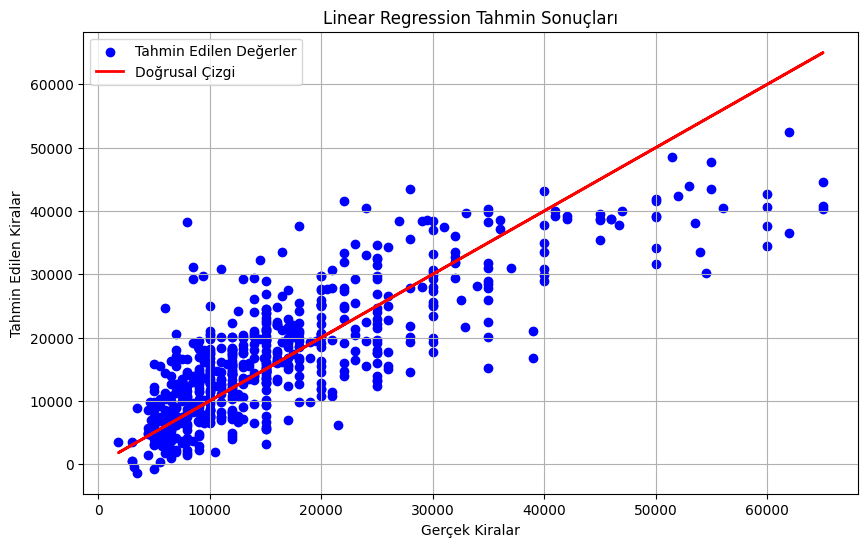

In [20]:
import matplotlib.pyplot as plt

# Tahmin yap
y_pred = model.predict(x_test)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahmin Edilen Değerler')  # Gerçek vs Tahmin
plt.plot(y_test, y_test, color='red', linewidth=2, label='Doğrusal Çizgi')  # Mükemmel Doğrusal Çizgi
plt.xlabel('Gerçek Kiralar')
plt.ylabel('Tahmin Edilen Kiralar')
plt.title('Linear Regression Tahmin Sonuçları')
plt.legend()
plt.grid(True)
plt.show()


## 8. Random Forest Modeli ile Tahmin

In [21]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model=RandomForestRegressor()
rfmodel=random_forest_model.fit(x_train,y_train)
rfmodel.score(x_test,y_test)

0.6512442899202562

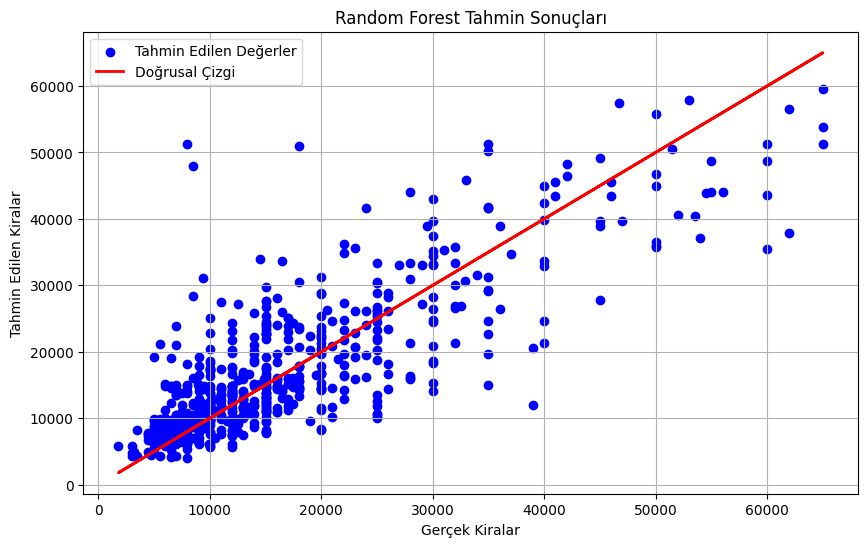

In [22]:
# Tahmin yap
y_pred = rfmodel.predict(x_test)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Tahmin Edilen Değerler')  # Gerçek vs Tahmin
plt.plot(y_test, y_test, color='red', linewidth=2, label='Doğrusal Çizgi')  # Mükemmel Doğrusal Çizgi
plt.xlabel('Gerçek Kiralar')
plt.ylabel('Tahmin Edilen Kiralar')
plt.title('Random Forest Tahmin Sonuçları')
plt.legend()
plt.grid(True)
plt.show()